<a href="https://colab.research.google.com/github/RiyaTodankar/ecowattAI/blob/main/copy_of_ecowattai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json

# Open the JSON file
with open('/content/energy-consumption-generation-prices-and-weather-metadata.json', 'r') as f:
    data = json.load(f)



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import requests

In [ ]:
# Simulated historical usage data (date, consumption in kWh)
data = pd.date_range(start='2024-01-01', end='2024-03-31', freq='D')
np.random.seed(42)  # For reproducibility
usage = np.random.uniform(8, 15, len(data))  # Random consumption values
df = pd.DataFrame({
    'date': data,
    'consumption_kwh': usage
})
df['dayofweek'] = df['date'].dt.dayofweek  # Add day of the week as a feature

<ipython-input-10-349006c56186>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2024-01-01', end='2024-03-31 23:00:00', freq='H')


Model Performance -> RMSE: 3026.73 MW | R2: -0.04

Predicted Load (Next 24 Hours):
                datetime  predicted_load
2160 2024-04-01 00:00:00    23605.365830
2161 2024-04-01 01:00:00    25842.404532
2162 2024-04-01 02:00:00    25910.520205
2163 2024-04-01 03:00:00    27277.373444
2164 2024-04-01 04:00:00    28109.736393


<ipython-input-10-349006c56186>:62: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future[features] = future[features].fillna(method='ffill')


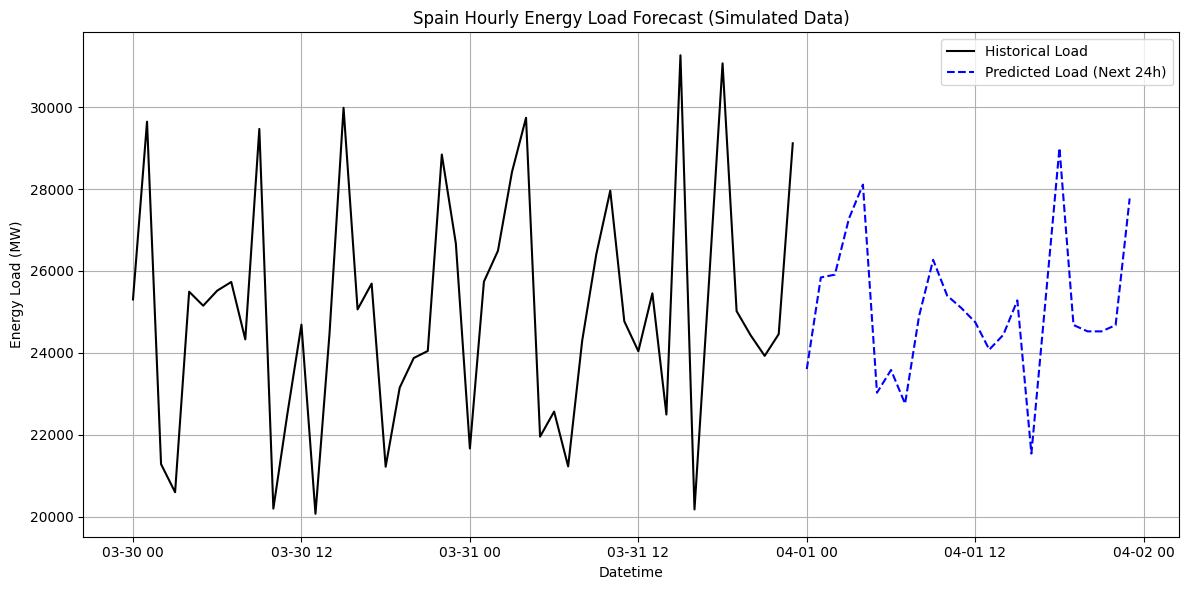

In [ ]:
# AI-Based Hourly Energy Load Forecasting (Spain, Simulated Data)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate hourly datetime range for 3 months
date_range = pd.date_range(start='2024-01-01', end='2024-03-31 23:00:00', freq='H')

# Simulate data (based on metadata)
np.random.seed(42)
n = len(date_range)
df = pd.DataFrame({
    'datetime': date_range,
    'total_load_actual': np.random.normal(loc=25000, scale=3000, size=n),  # Simulated load in MW
    'generation_fossil_gas': np.random.uniform(5000, 8000, n),
    'generation_nuclear': np.random.uniform(4000, 6000, n),
    'generation_wind_onshore': np.random.uniform(2000, 7000, n),
    'temperature': np.random.uniform(5, 25, n),
    'humidity': np.random.uniform(30, 90, n),
    'pressure': np.random.uniform(990, 1030, n),
    'wind_speed': np.random.uniform(0, 15, n)
})

# Feature engineering
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

# Select features and target
features = [
    'generation_fossil_gas', 'generation_nuclear', 'generation_wind_onshore',
    'temperature', 'humidity', 'pressure', 'wind_speed',
    'hour', 'dayofweek'
]
target = 'total_load_actual'

# Drop NA values
df = df.dropna(subset=features + [target])

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Model Performance -> RMSE: {rmse:.2f} MW | R2: {r2:.2f}")

# Forecast next 24 hours
last_known = df.iloc[-24:].copy()
future = last_known.copy()
future['datetime'] = future['datetime'] + pd.Timedelta(days=1)
future[features] = future[features].fillna(method='ffill')
future['predicted_load'] = model.predict(future[features])

# Display forecast
print("\nPredicted Load (Next 24 Hours):")
print(future[['datetime', 'predicted_load']].head())

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'].tail(48), df['total_load_actual'].tail(48), label='Historical Load', color='black')
plt.plot(future['datetime'], future['predicted_load'], label='Predicted Load (Next 24h)', color='blue', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Energy Load (MW)')
plt.title('Spain Hourly Energy Load Forecast (Simulated Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
